In [769]:
import pandas as pd

In [770]:
import warnings
warnings.filterwarnings('ignore')

In [771]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.xls')

In [772]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [773]:
df.shape

(7043, 21)

In [774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [775]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [776]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [777]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [778]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [779]:
df['SeniorCitizen']= df ['SeniorCitizen'].astype(object) # Convert SeniorCitizen column into object type

In [780]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [781]:
df = df.drop('customerID', axis=1)

In [782]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [783]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

# **1. Handling Missing Values**

In [784]:
# Fill the NaN values with 0
df['TotalCharges'].fillna(0, inplace=True)

In [785]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# **2. Univariate Analysis**

**Categorical Columns**

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435

##########################################



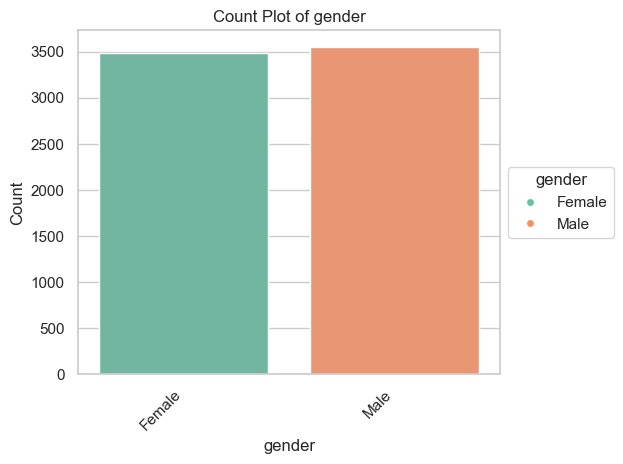

               SeniorCitizen      Ratio
SeniorCitizen                          
0                       5901  83.785319
1                       1142  16.214681

##########################################



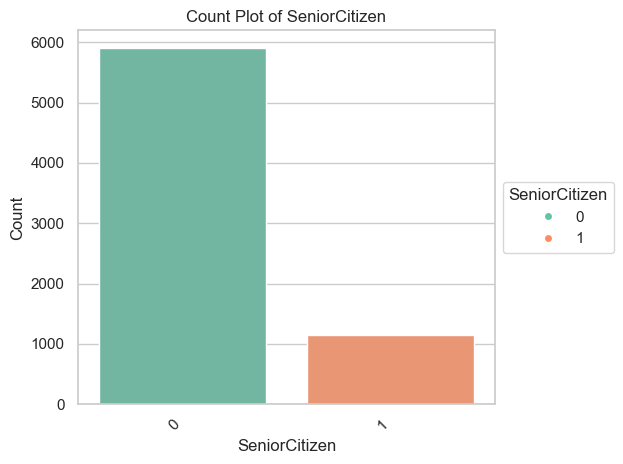

         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328

##########################################



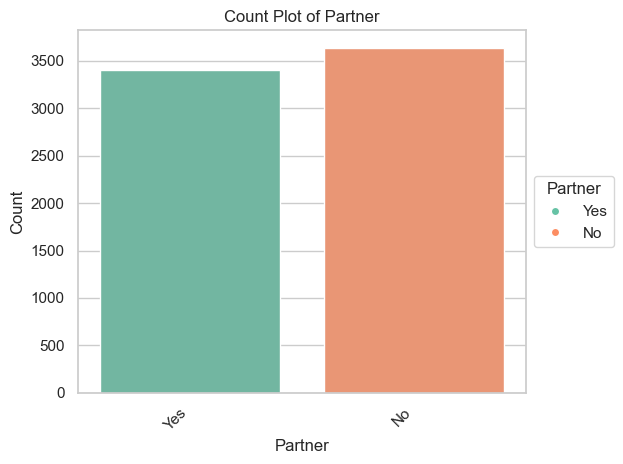

            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824

##########################################



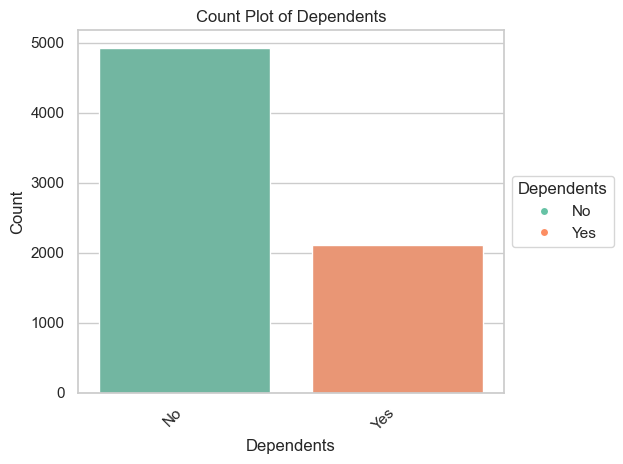

              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374

##########################################



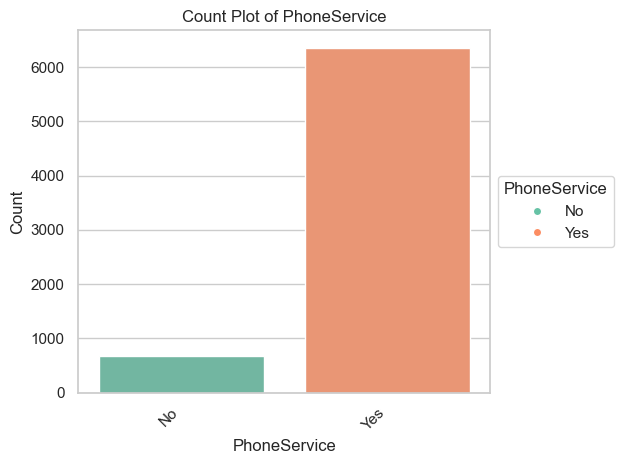

                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374

##########################################



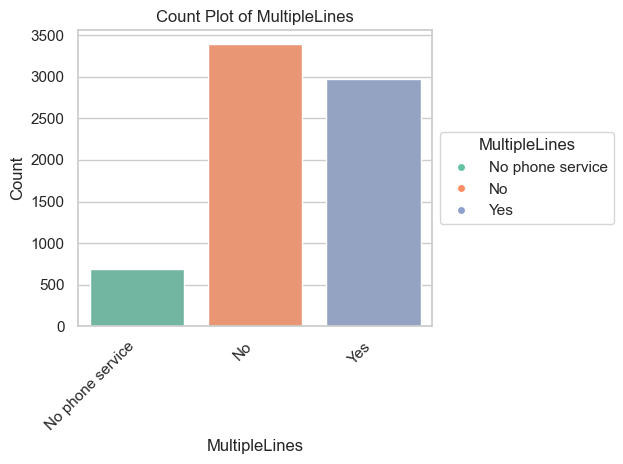

                 InternetService      Ratio
InternetService                            
Fiber optic                 3096  43.958540
DSL                         2421  34.374556
No                          1526  21.666903

##########################################



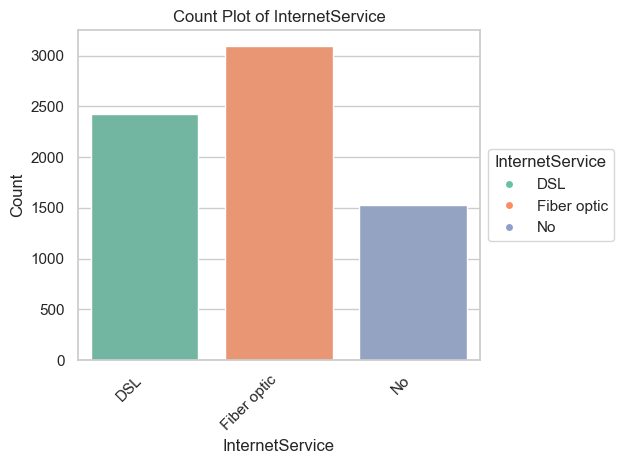

                     OnlineSecurity      Ratio
OnlineSecurity                                
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903

##########################################



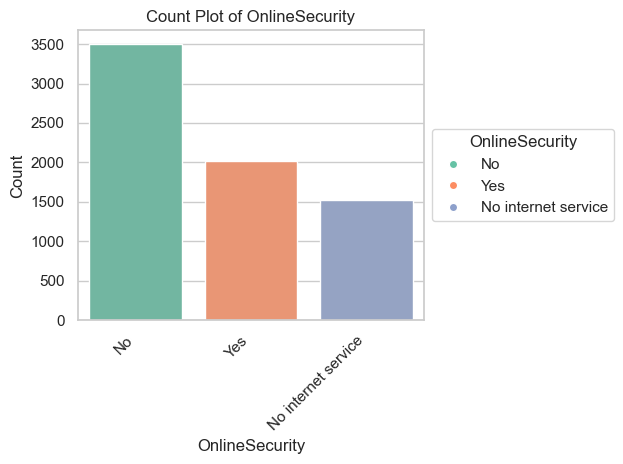

                     OnlineBackup      Ratio
OnlineBackup                                
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903

##########################################



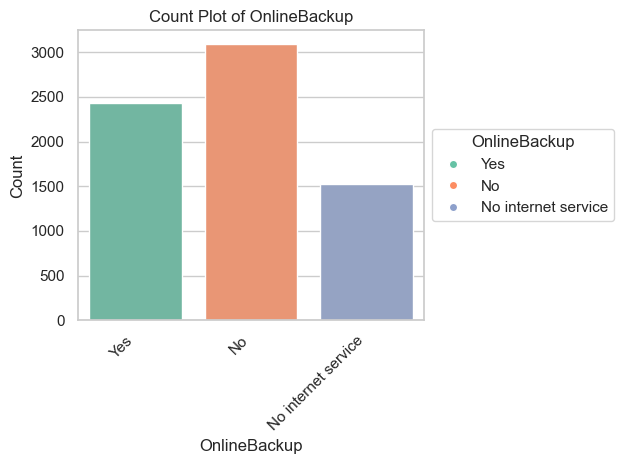

                     DeviceProtection      Ratio
DeviceProtection                                
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903

##########################################



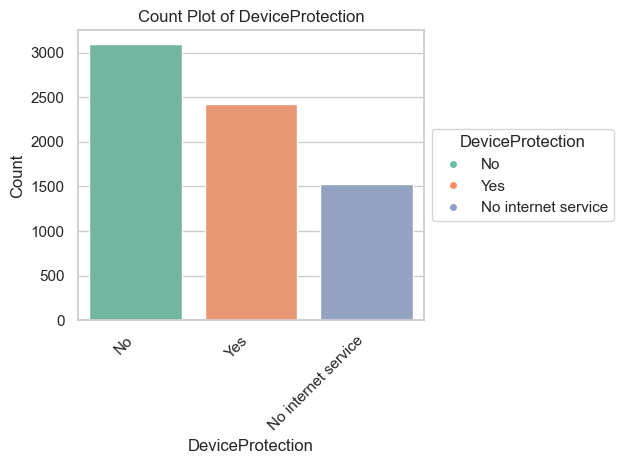

                     TechSupport      Ratio
TechSupport                                
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903

##########################################



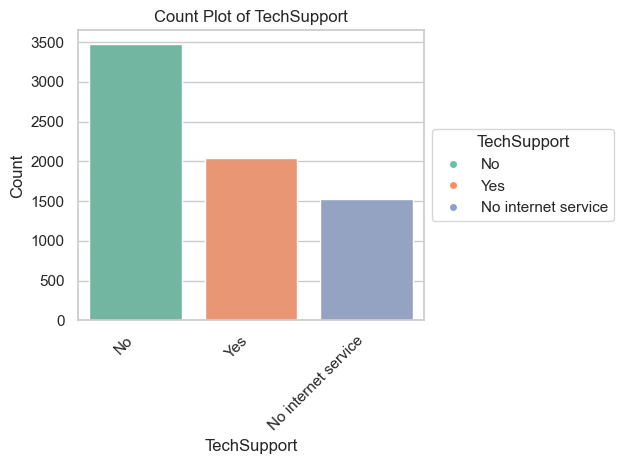

                     StreamingTV      Ratio
StreamingTV                                
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903

##########################################



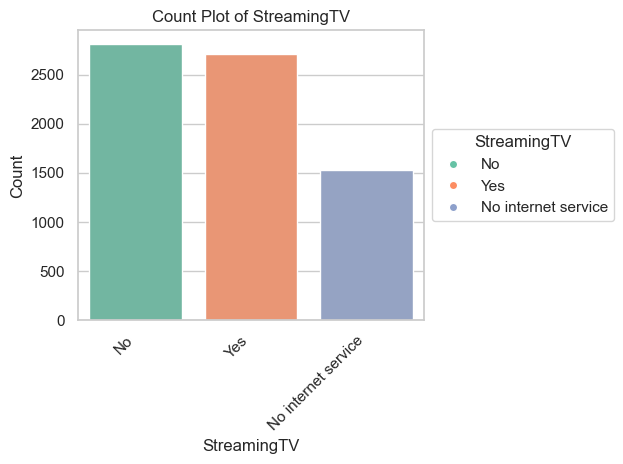

                     StreamingMovies      Ratio
StreamingMovies                                
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903

##########################################



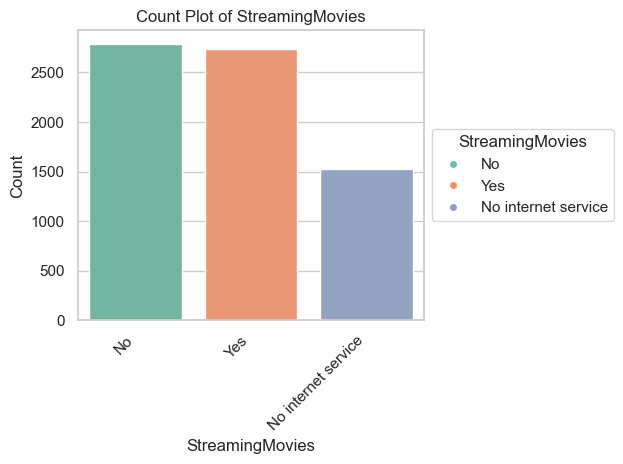

                Contract      Ratio
Contract                           
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383

##########################################



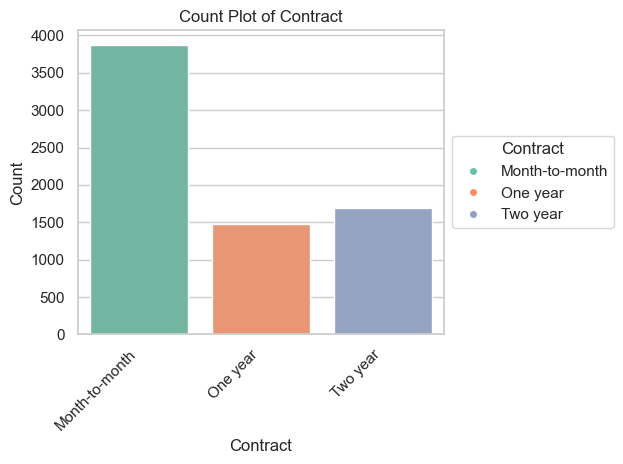

                  PaperlessBilling      Ratio
PaperlessBilling                             
Yes                           4171  59.221922
No                            2872  40.778078

##########################################



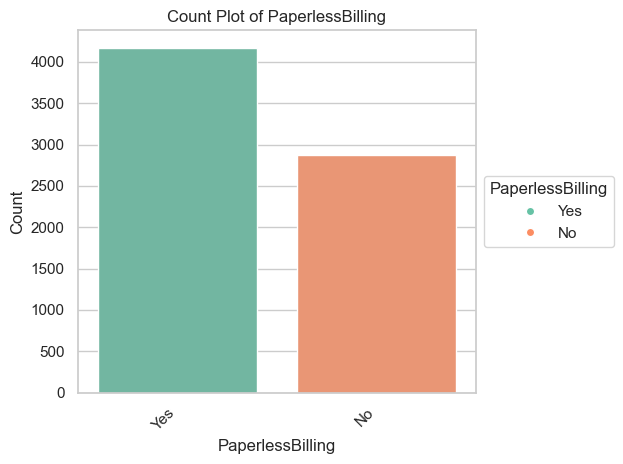

                           PaymentMethod      Ratio
PaymentMethod                                      
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109

##########################################



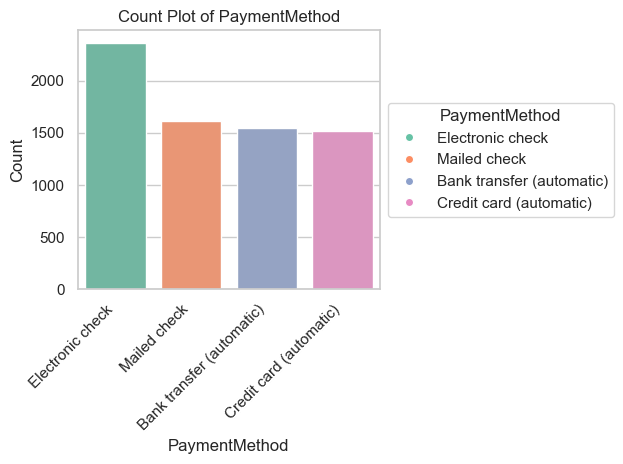

       Churn      Ratio
Churn                  
No      5174  73.463013
Yes     1869  26.536987

##########################################



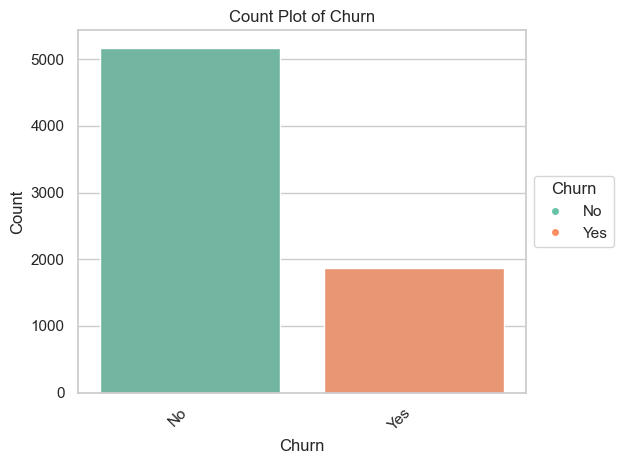

In [786]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def cat_summary(dataframe, col_name, plot=False):
    # Print summary table of value counts and their ratios
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),"Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("\n##########################################\n")

    # Plot if plot=True
    if plot:
        # Count plot without hue to avoid FutureWarning
        ax = sns.countplot(x=col_name, data=dataframe, palette="Set2", hue=col_name)

        # Set labels and title
        plt.xlabel(col_name)
        plt.ylabel("Count")
        plt.title(f"Count Plot of {col_name}")

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')

        # Manually create the legend
        unique_values = dataframe[col_name].unique()
        handles = [plt.Line2D([0], [0], marker='o', color='w', label=value,markerfacecolor=sns.color_palette("Set2")[i])for i, value in enumerate(unique_values)]

        # Adjust legend position to the right side of the plot
        plt.legend(title=col_name, handles=handles, loc="center left", bbox_to_anchor=(1, 0.5))

        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()

# Assuming cat_cols is a list of categorical columns
for col in cat_cols:
    cat_summary(df, col, plot=True)

**Numerical Columns**


*************** tenure ***************

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


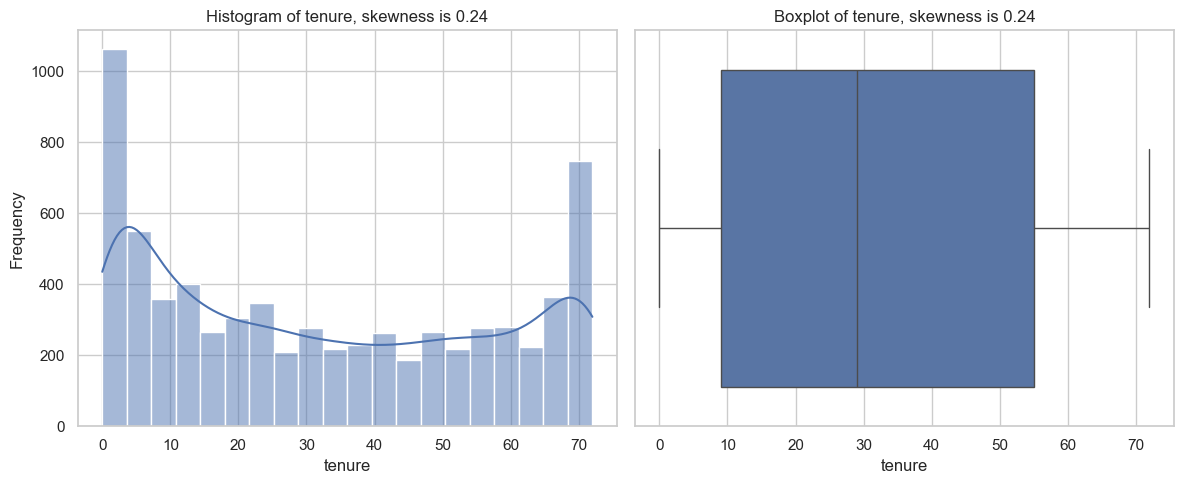


*************** MonthlyCharges ***************

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


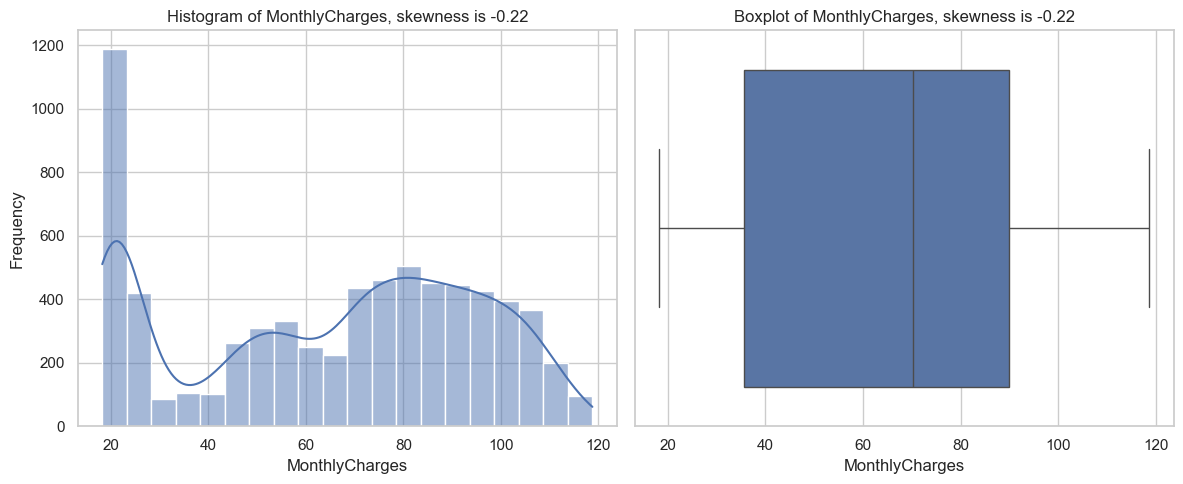


*************** TotalCharges ***************

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


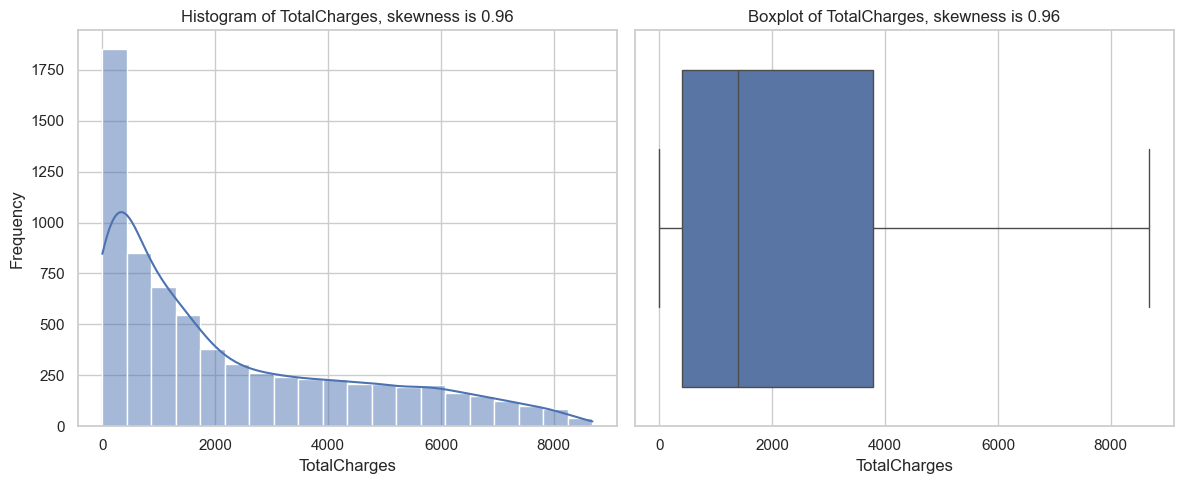

In [787]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def num_summary(dataframe, numerical_col):
    print('\n***************', numerical_col, '***************\n')
    print(dataframe[numerical_col].describe())

def univariate_plots(dataframe, numerical_cols):
    for col in numerical_cols:
        # Call num_summary to print statistics
        num_summary(dataframe, col)

        # Create a figure for the histogram
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=20, kde=True)
        plt.title(f'Histogram of {col}, skewness is {round(dataframe[col].skew(), 2)}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataframe[col])
        plt.title(f'Boxplot of {col}, skewness is {round(dataframe[col].skew(), 2)}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

# List of numerical columns to plot
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Generate univariate plots
univariate_plots(df, num_cols)

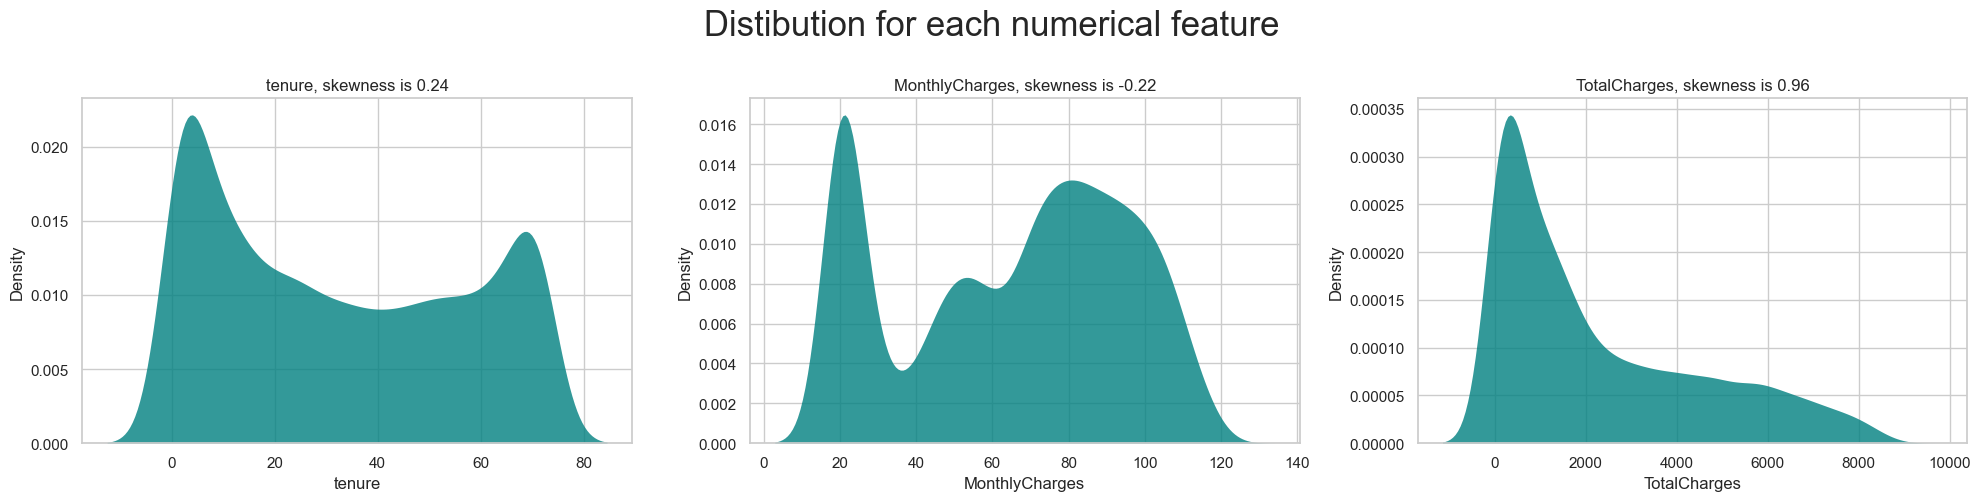

In [788]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=df, columns_list=num_cols, rows=1, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()

# **3. Bivariate Analysis**

**Categorical Columns**

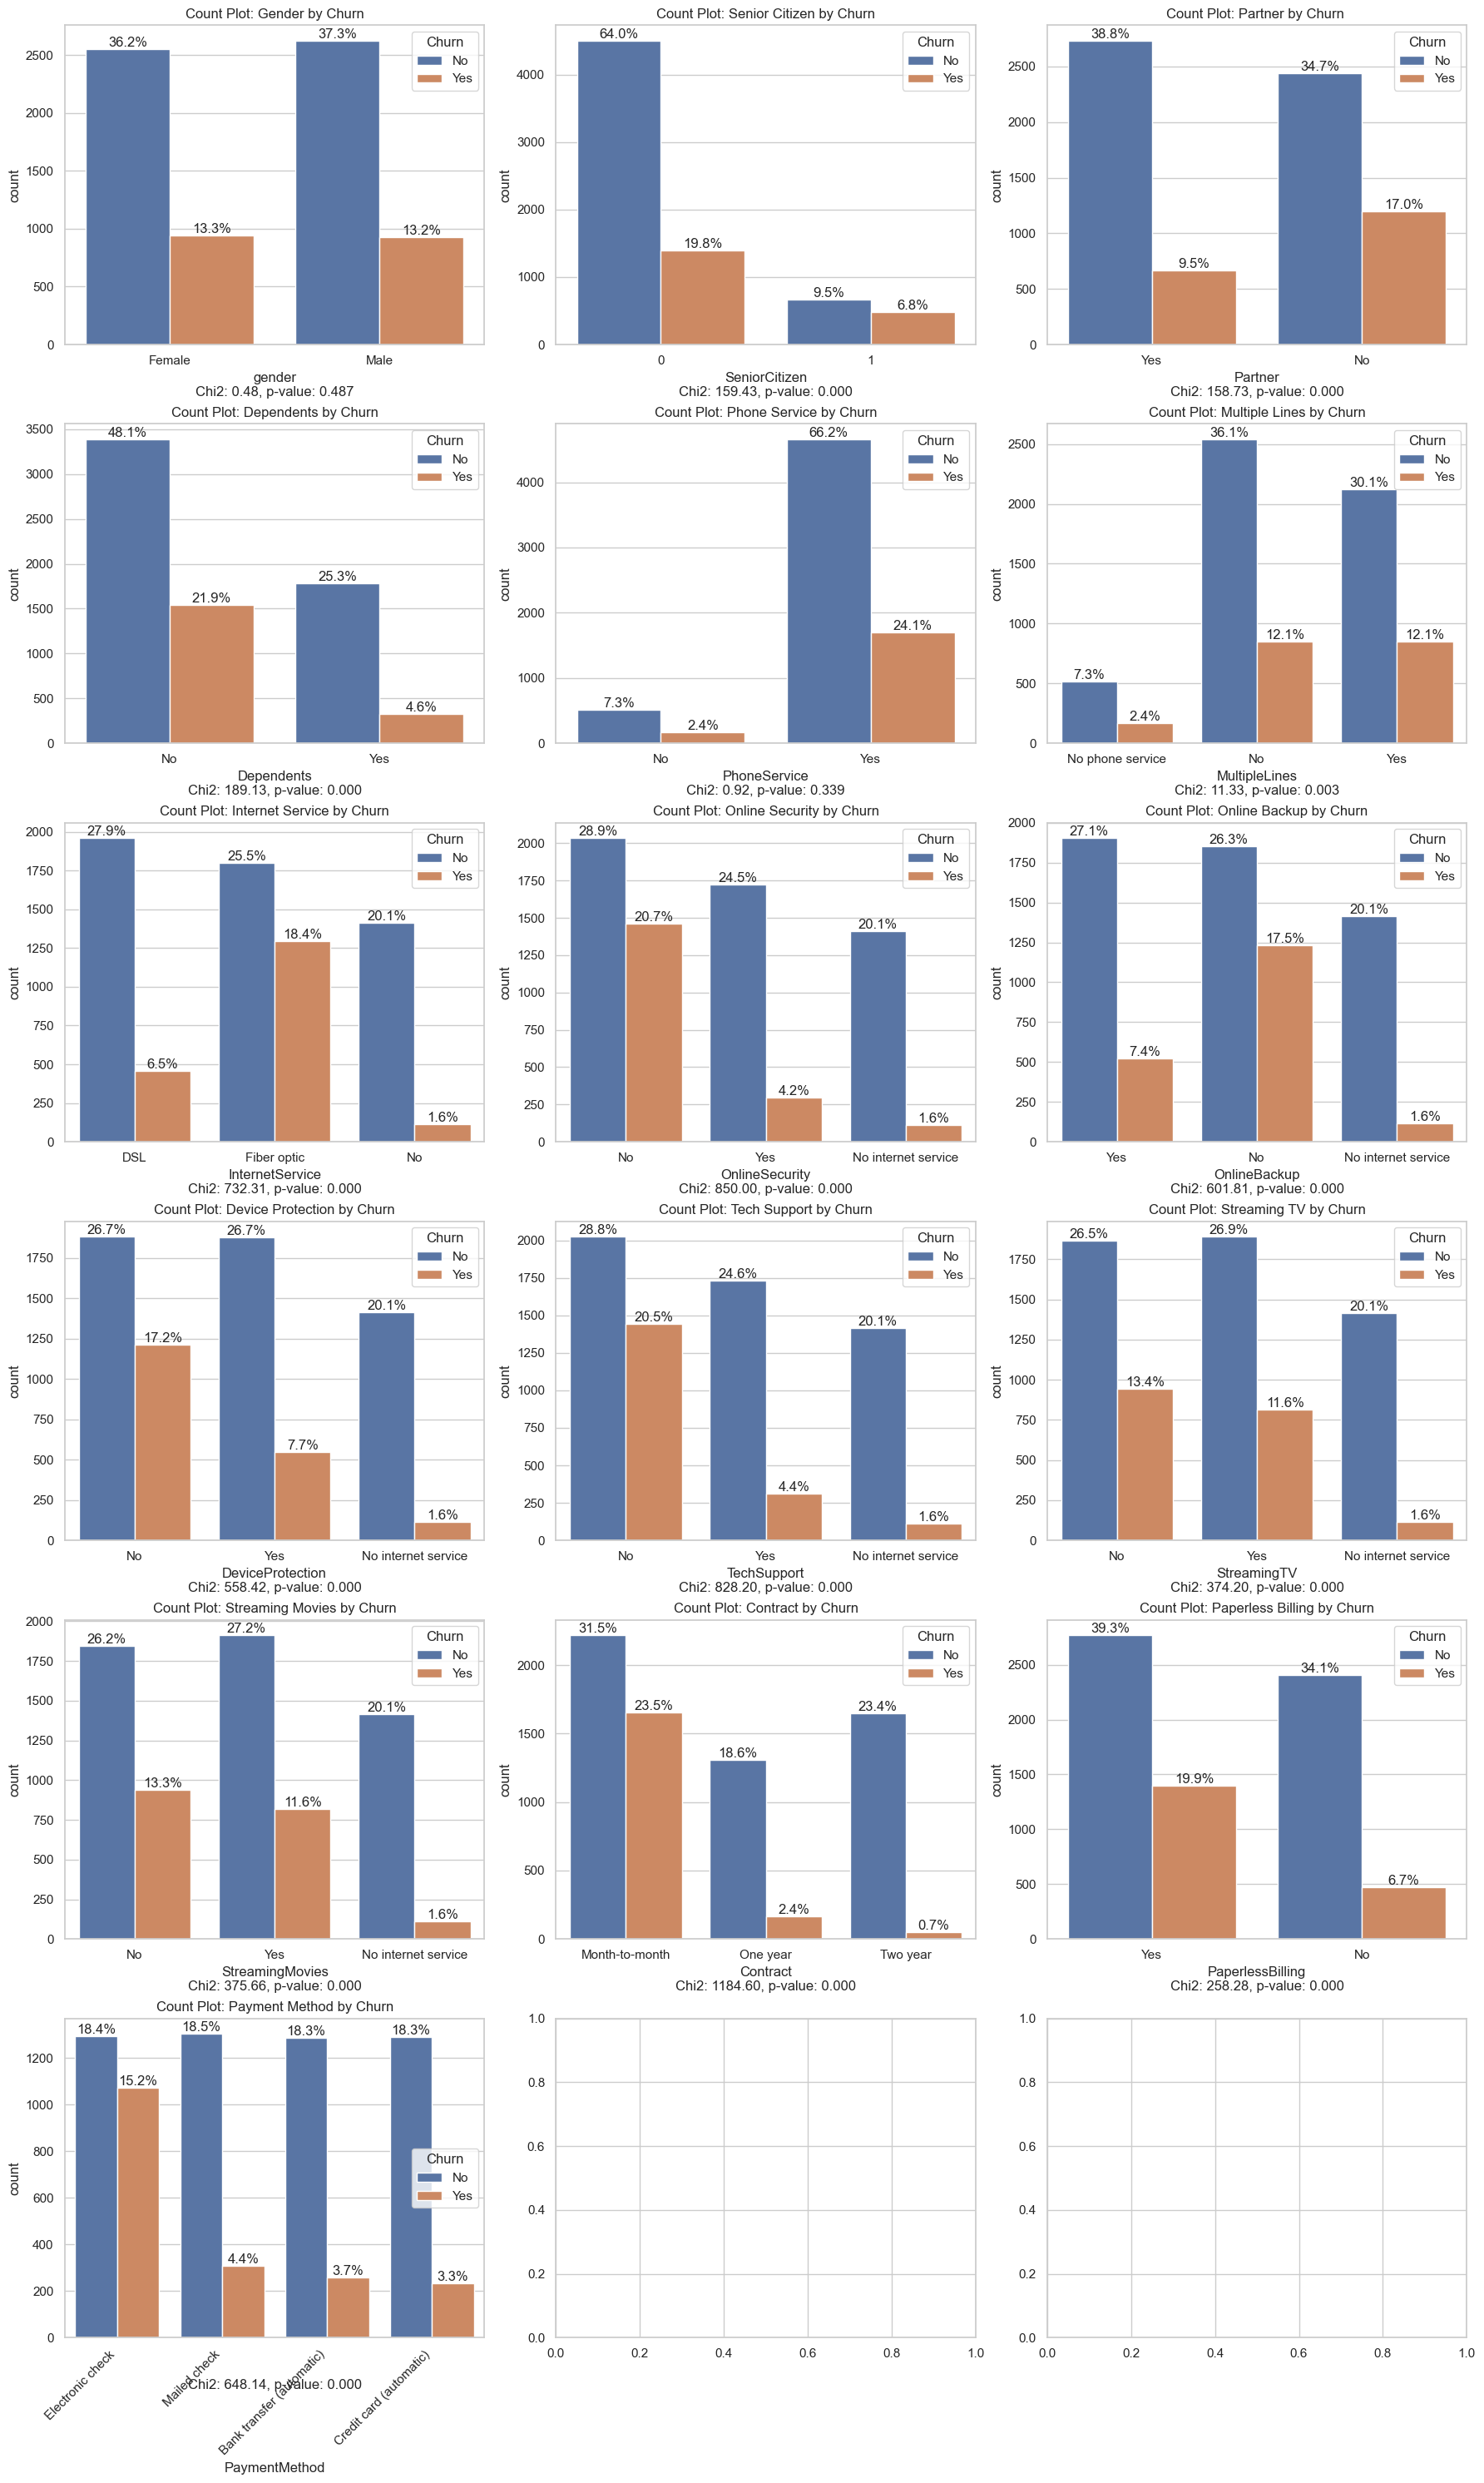

In [789]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Function to calculate Chi-Square and p-value
def chi_square_test(dataframe, feature, target):
    contingency_table = pd.crosstab(dataframe[feature], dataframe[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

# List of features to plot
features = [
    ('gender', 'Count Plot: Gender by Churn'),
    ('SeniorCitizen', 'Count Plot: Senior Citizen by Churn'),
    ('Partner', 'Count Plot: Partner by Churn '),
    ('Dependents', 'Count Plot: Dependents by Churn'),
    ('PhoneService', 'Count Plot: Phone Service by Churn'),
    ('MultipleLines', 'Count Plot: Multiple Lines by Churn'),
    ('InternetService', 'Count Plot: Internet Service by Churn'),
    ('OnlineSecurity', 'Count Plot: Online Security by Churn'),
    ('OnlineBackup', 'Count Plot: Online Backup by Churn'),
    ('DeviceProtection', 'Count Plot: Device Protection by Churn'),
    ('TechSupport', 'Count Plot: Tech Support by Churn'),
    ('StreamingTV', 'Count Plot: Streaming TV by Churn'),
    ('StreamingMovies', 'Count Plot: Streaming Movies by Churn'),
    ('Contract', 'Count Plot: Contract by Churn'),
    ('PaperlessBilling', 'Count Plot: Paperless Billing by Churn'),
    ('PaymentMethod', 'Count Plot: Payment Method by Churn'),
]

# Create subplots with enough space
fig, axes = plt.subplots(6, 3, figsize=(18, 30))

# Loop through the features for count plots
for i, (feature, title) in enumerate(features):
    ax = axes[i // 3, i % 3]  # Determine the correct subplot
    sns.countplot(data=df, x=feature, hue='Churn', ax=ax)
    ax.set_title(title)

    # Calculate total counts for percentages
    total = len(df)

    # Add percentage annotations on top of the bars
    for p in ax.patches:
        height = p.get_height()
        if height == 0:  # Skip if the bar height is 0 (0.0%)
            continue
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%',(p.get_x() + p.get_width() / 2., height),ha='center', va='bottom')

    # Perform Chi-Square test and get results
    chi2, p = chi_square_test(df, feature, 'Churn')
    ax.text(0.5, -0.15, f'Chi2: {chi2:.2f}, p-value: {p:.3f}', ha='center', va='center', transform=ax.transAxes)

    # Use plt.xticks() for proper x-tick label rotation if needed
    if feature == 'PaymentMethod':
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

**Numerical Columns**

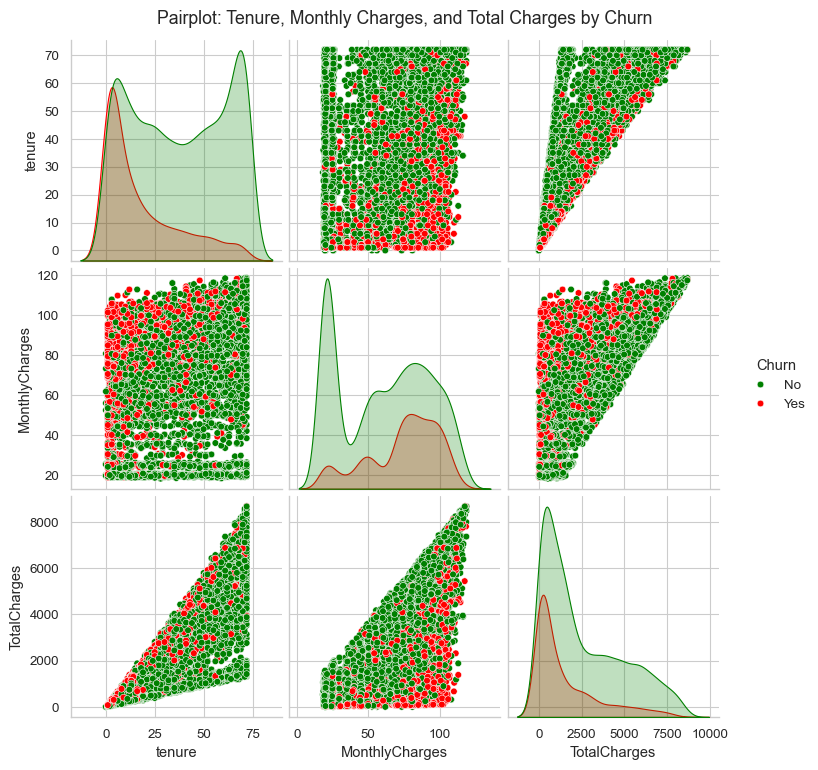

In [790]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the selected columns
plot_data = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

# Set the context for the plot
sns.set_context("paper", font_scale=1.1)

# Create pairplot
pair_plot = sns.pairplot(plot_data, hue='Churn', palette={'Yes': 'red', 'No': 'green'})

# Set titles
pair_plot.fig.suptitle('Pairplot: Tenure, Monthly Charges, and Total Charges by Churn', y=1.02)

# Show the plot
plt.show()

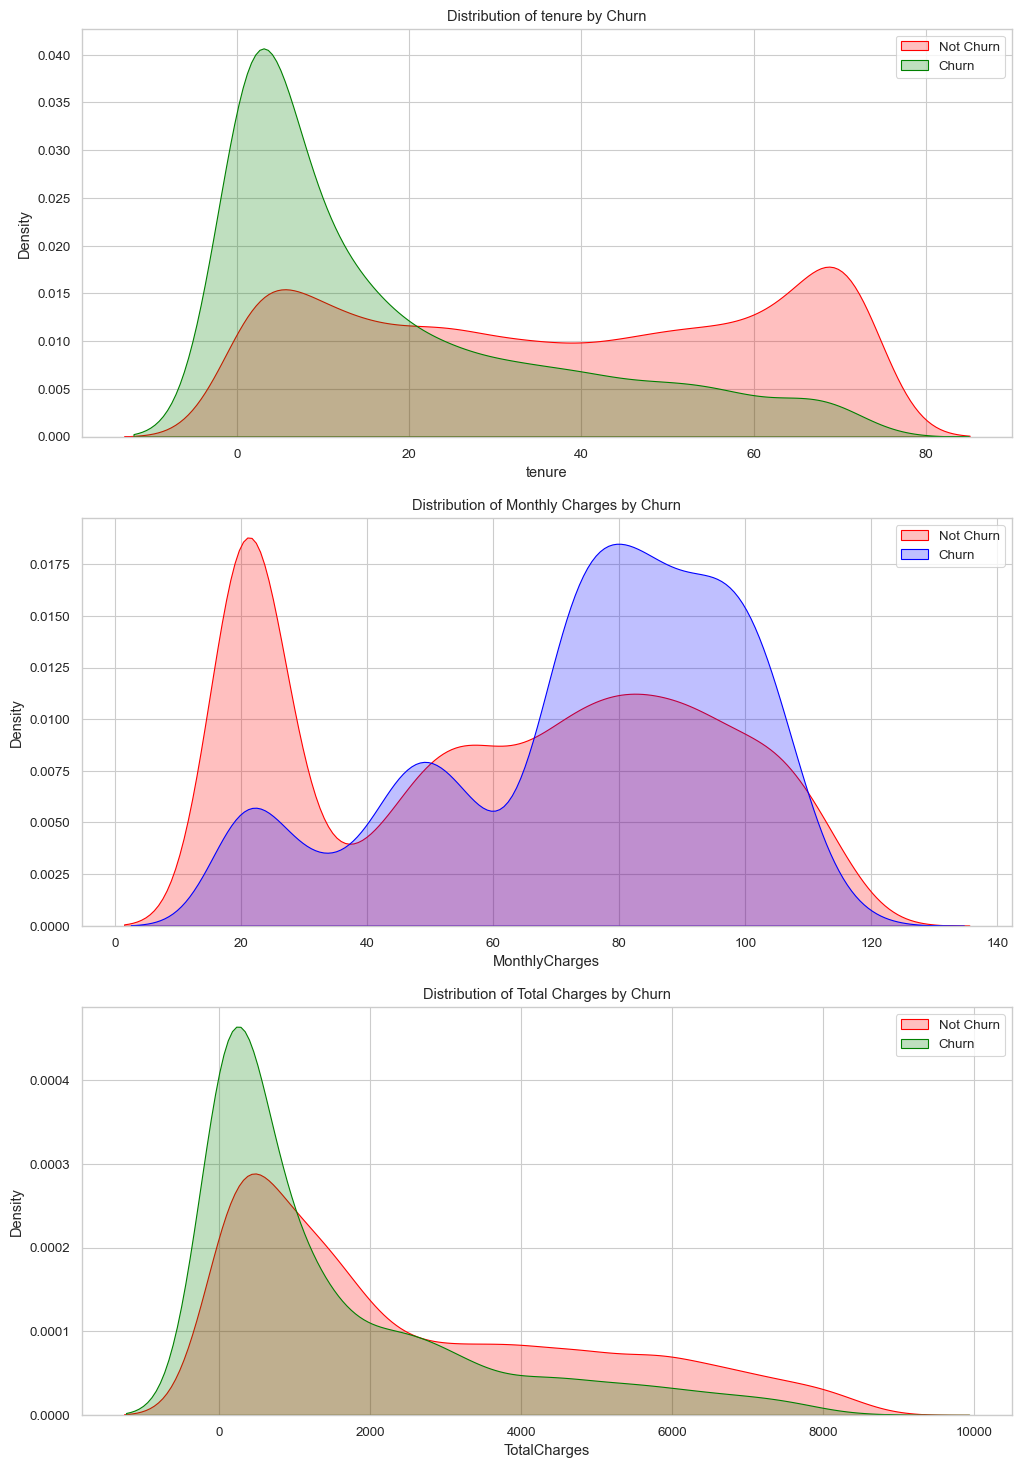

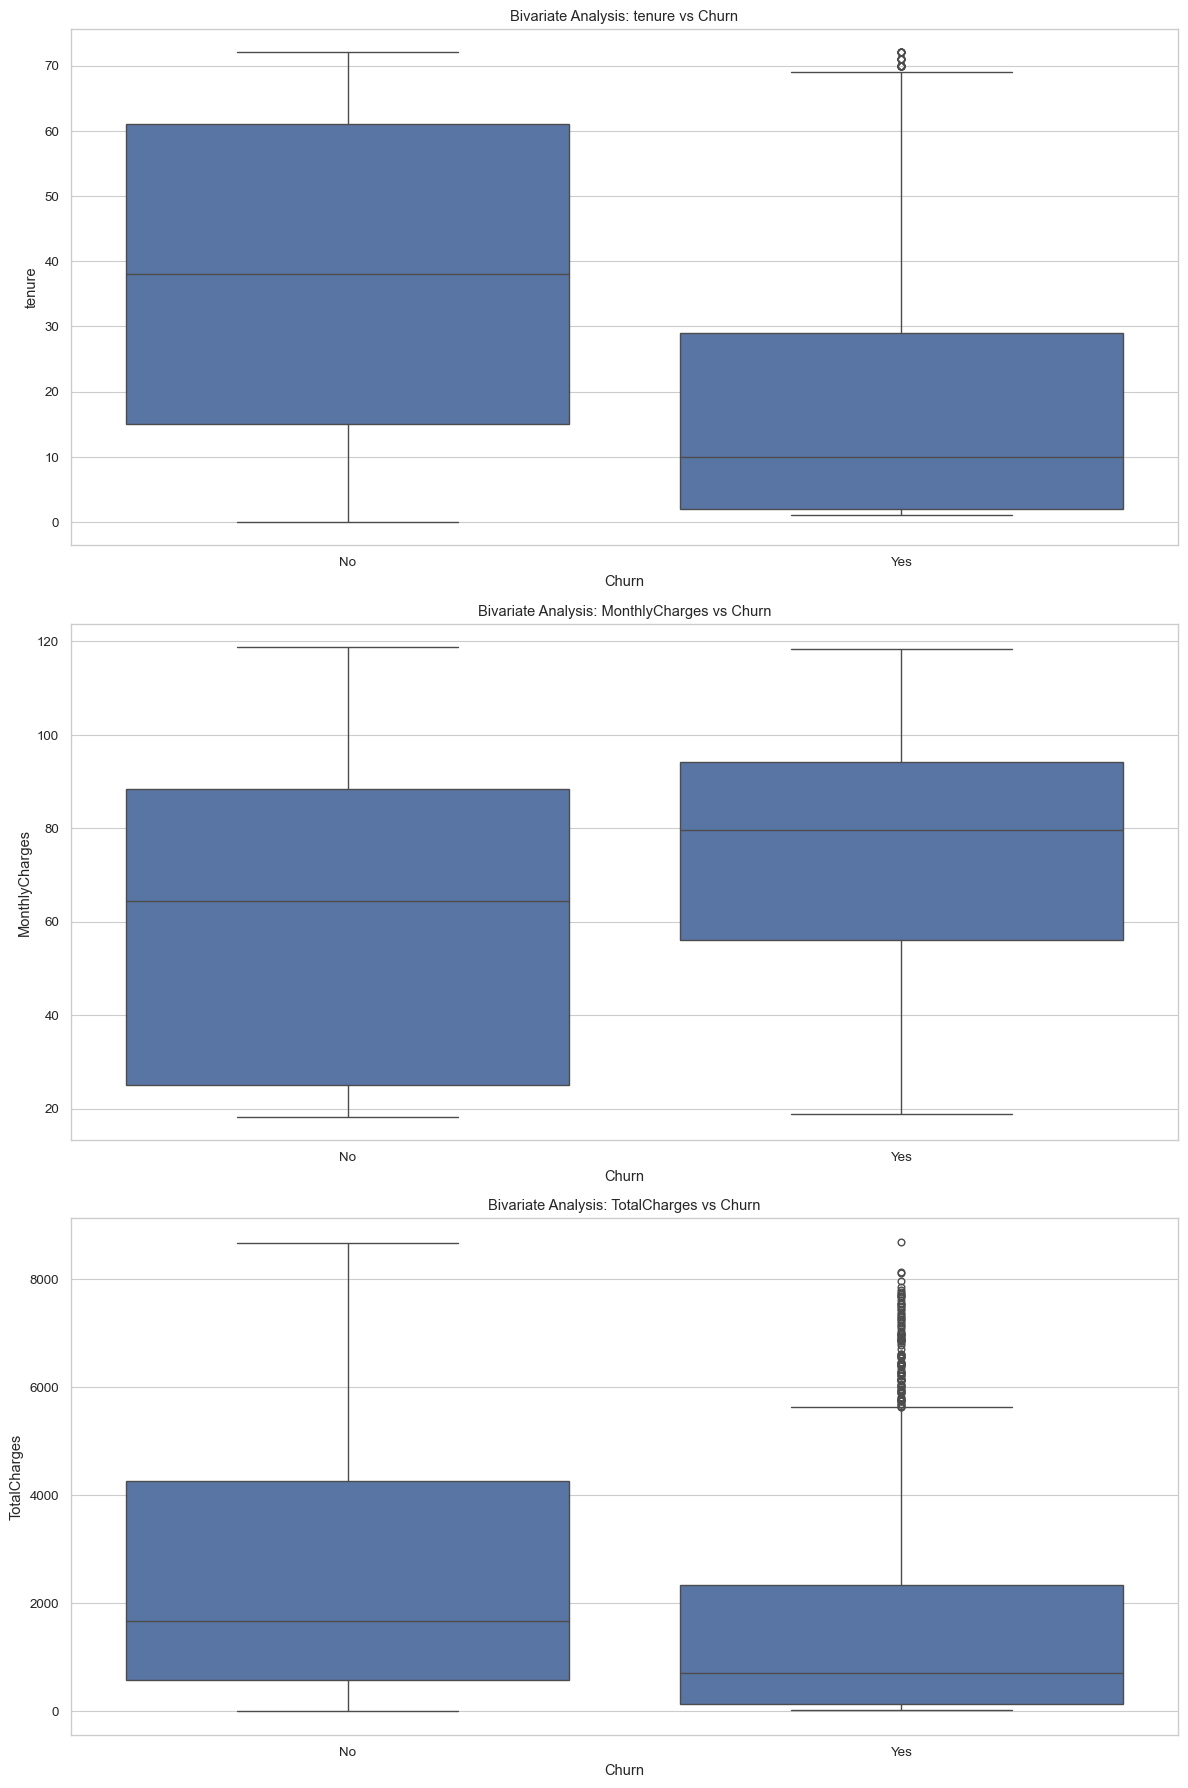

In [791]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the context for the plots
sns.set_context("paper", font_scale=1.1)

# List of features for KDE plots
features = [
    ('tenure', 'Red', 'Green', 'Distribution of tenure by Churn'),
    ('MonthlyCharges', 'Red', 'Blue', 'Distribution of Monthly Charges by Churn'),
    ('TotalCharges', 'Red', 'Green', 'Distribution of Total Charges by Churn')
]

# List of numerical columns for box plots
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create subplots with 2 rows for KDE and 3 for box plots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Loop through the features to create KDE plots
for i, (feature, color_no, color_yes, title) in enumerate(features):
    ax = sns.kdeplot(df[feature][df["Churn"] == 'No'], color=color_no, fill=True, ax=axes[i])
    ax = sns.kdeplot(df[feature][df["Churn"] == 'Yes'], ax=ax, color=color_yes, fill=True)

    # Add legend and labels
    ax.legend(["Not Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(feature)
    ax.set_title(title)

# Create box plots for the numerical columns in a new figure
fig2, axes2 = plt.subplots(3, 1, figsize=(12, 18))

# Loop through numerical columns to create box plots
for i, col in enumerate(num_cols):
    ax = sns.boxplot(x='Churn', y=col, data=df, ax=axes2[i])
    ax.set_title(f'Bivariate Analysis: {col} vs Churn')

# Adjust layout for both figures
plt.tight_layout()
plt.show()

# **4. Dealing with Outliers**

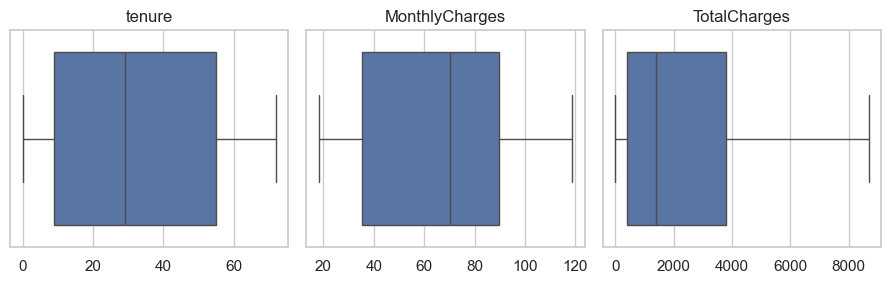

In [792]:
sns.set(style="whitegrid")

numerical_columns = [col for col in df.columns if df[col].dtype !='object']

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [793]:
for col in num_cols:
  print(f"Column: {col}")
  print(f"Minimum: {df[col].min()}")
  print(f"Maximum: {df[col].max()}")
  print("-" * 20)

Column: tenure
Minimum: 0
Maximum: 72
--------------------
Column: MonthlyCharges
Minimum: 18.25
Maximum: 118.75
--------------------
Column: TotalCharges
Minimum: 0.0
Maximum: 8684.8
--------------------


**Based on the boxplot, there are no data points beyond the whiskers, indicating the absence of outliers in the dataset. Although the data is right-skewed, there are no outliers, meaning all values fall within a reasonable range. The skewness reflects the natural distribution of the data, with most values concentrated on the left and a gradual tail on the right, but no extreme points distort the dataset.**

# **5. Feature Engineering**

In [794]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [795]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Data transformation of columns ('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies') by converting 'No Internet Service' to 'No' for consistency and clarity**

In [796]:
# Columns to apply the transformation
columns_to_update = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace 'No internet service' with 'No' in the specified columns
df[columns_to_update] = df[columns_to_update].replace('No internet service', 'No')

**Data transformation of column MultipleLines by converting 'No phone service' to 'No' for consistency and clarity**

In [797]:
# Replace 'No phone service' with 'No' in the 'MultipleLines' column
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

**tenure_bin is created by assigning labels to tenure based on the defined bins.**

In [798]:
# Define the bins and corresponding labels
bins = [-1, 24, 48, 72]
labels = ['New', 'Mid', 'Long']

# Create the tenure_bin column
df['tenure_bin'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

**ChurnRisk column is created**

In [799]:
df['ChurnRisk'] = ((df['tenure'] < 12) & (df['MonthlyCharges'] > df['MonthlyCharges'].median())).astype(int)

**Contract_Internet column is created**

In [800]:
# Create interaction feature between Contract type and Internet service type
df['Contract_Internet'] = ((df['Contract'] == 'Month-to-month') & (df['InternetService'] == 'Fiber optic')).astype(int)

In [801]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             7043 non-null   object  
 1   SeniorCitizen      7043 non-null   object  
 2   Partner            7043 non-null   object  
 3   Dependents         7043 non-null   object  
 4   tenure             7043 non-null   int64   
 5   PhoneService       7043 non-null   object  
 6   MultipleLines      7043 non-null   object  
 7   InternetService    7043 non-null   object  
 8   OnlineSecurity     7043 non-null   object  
 9   OnlineBackup       7043 non-null   object  
 10  DeviceProtection   7043 non-null   object  
 11  TechSupport        7043 non-null   object  
 12  StreamingTV        7043 non-null   object  
 13  StreamingMovies    7043 non-null   object  
 14  Contract           7043 non-null   object  
 15  PaperlessBilling   7043 non-null   object  
 16  Paymen

In [802]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Columns for Label Encoding (binary columns)
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling', 'Churn', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','MultipleLines','SeniorCitizen']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the binary columns, checking if they exist in the DataFrame
for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [803]:
# Columns for One Hot Encoding (nominal columns)
one_hot_cols = ['Contract', 'PaymentMethod', 'InternetService','tenure_bin']

# Initialize the OneHotEncoder
ohe = OneHotEncoder()
ohe_result = ohe.fit_transform(df[one_hot_cols])
ohe_columns = ohe.get_feature_names_out(one_hot_cols)
df = pd.concat([df.drop(columns=one_hot_cols), pd.DataFrame(ohe_result.toarray(), columns=ohe_columns)],axis=1)

# **7. Scaling**

In [804]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
mms1 = MinMaxScaler()
#ss = StandardScaler() # Standardization

df['tenure'] = mms.fit_transform(df[['tenure']])
# df['MonthlyCharges'] = mms.fit_transform(df[['MonthlyCharges']])
# df['TotalCharges'] = mms1.fit_transform(df[['TotalCharges']])

Text(0.5, 1.0, 'Correlation w.r.t Outcome')

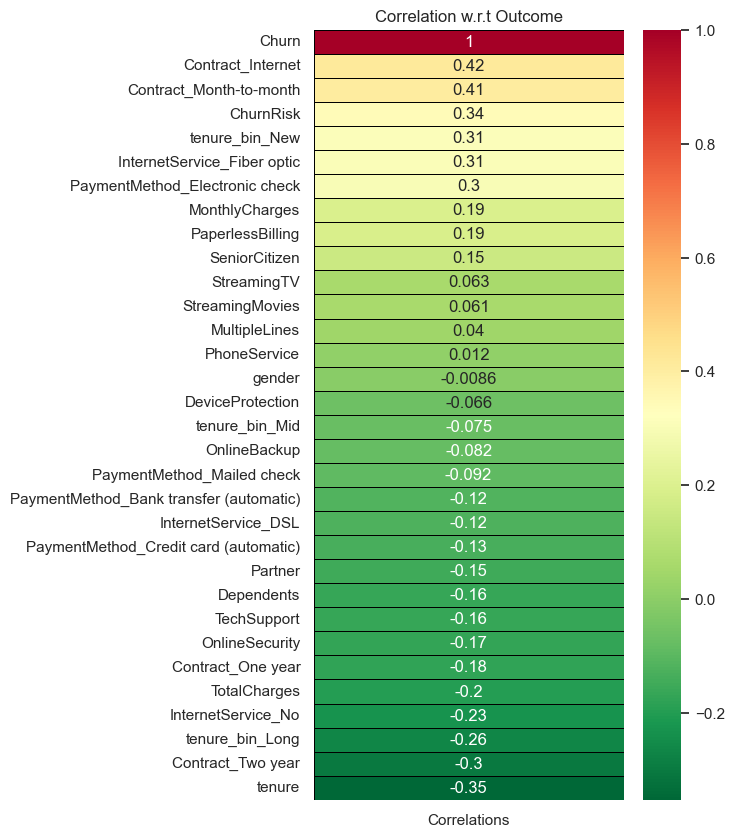

In [805]:
corr = df.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,10))
sns.heatmap(corr,annot = True,cmap ='RdYlGn_r',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome')

<Axes: >

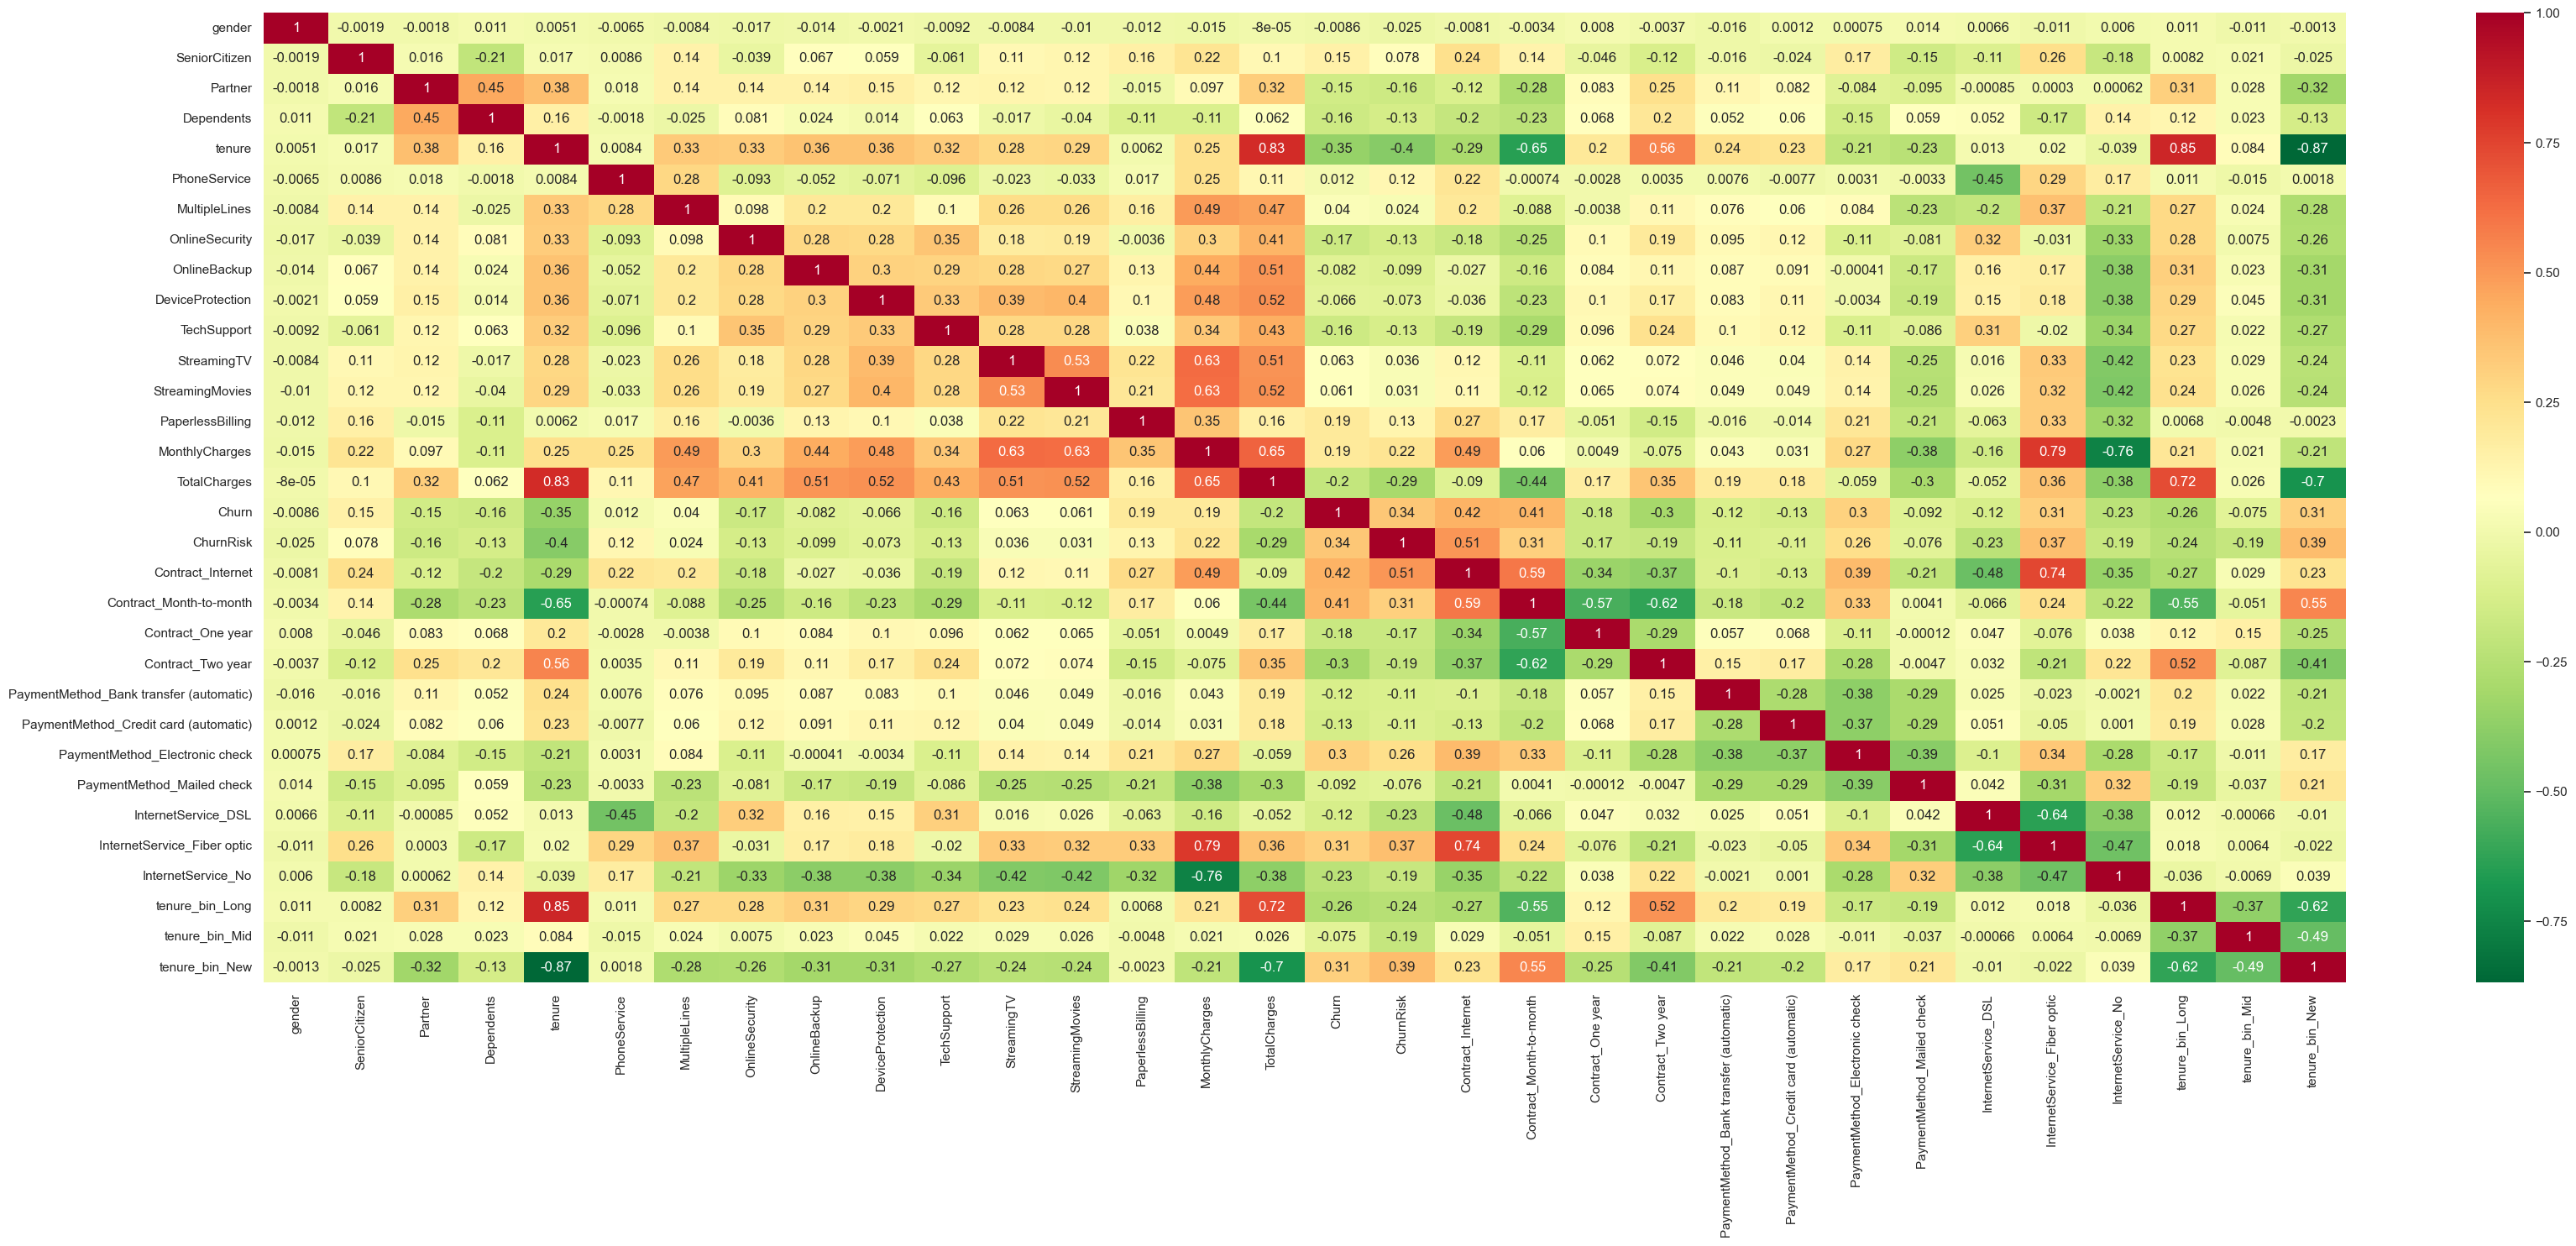

In [806]:
plt.figure(figsize = (40,15))
sns.heatmap(df.corr(),cmap = 'RdYlGn_r',annot = True)

In [807]:
cat_new=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_DSL', 'InternetService_Fiber optic','InternetService_No', 'tenure_bin_Long', 'tenure_bin_Mid','tenure_bin_New', 'ChurnRisk', 'Contract_Internet']

**Chi Squared Score**

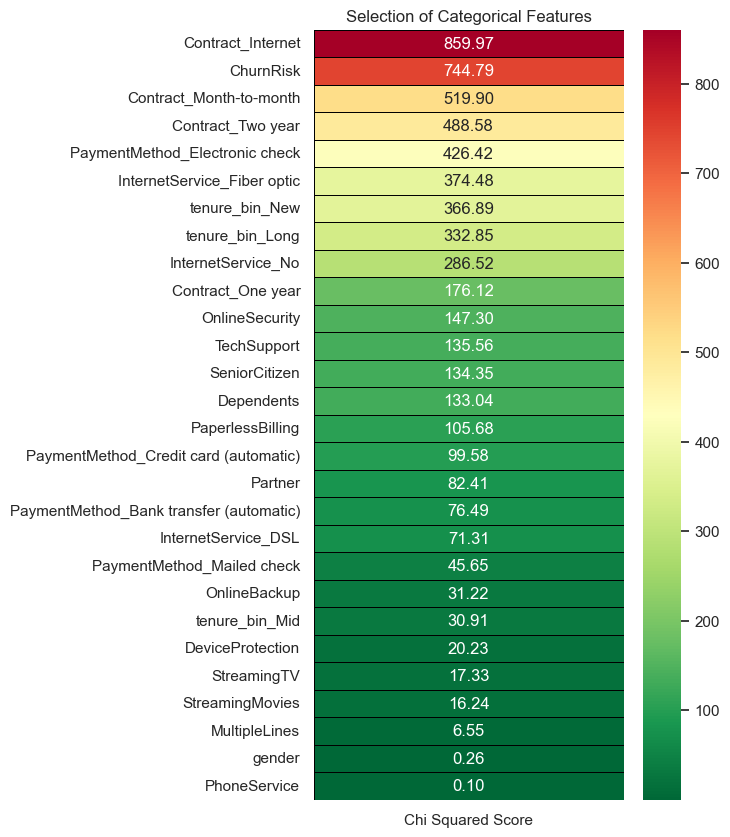

In [808]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
features = df.loc[:,cat_new]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(cat_new),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,10))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'RdYlGn_r',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

**P Value**

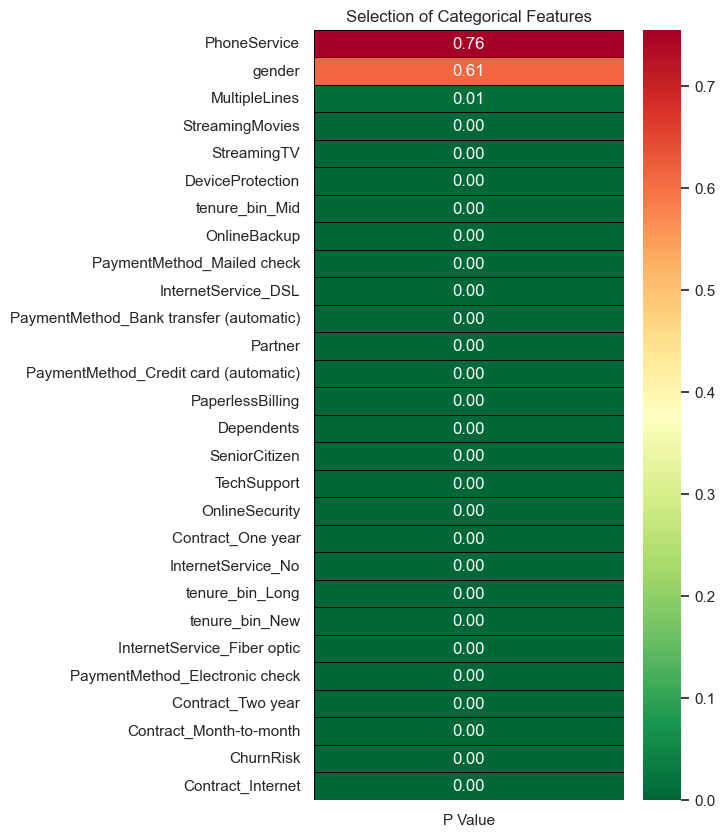

In [809]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
features = df.loc[:,cat_new]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.pvalues_,index = list(cat_new),columns = ['P Value'])

plt.subplots(figsize = (5,10))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'P Value'),annot = True,cmap = 'RdYlGn_r',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

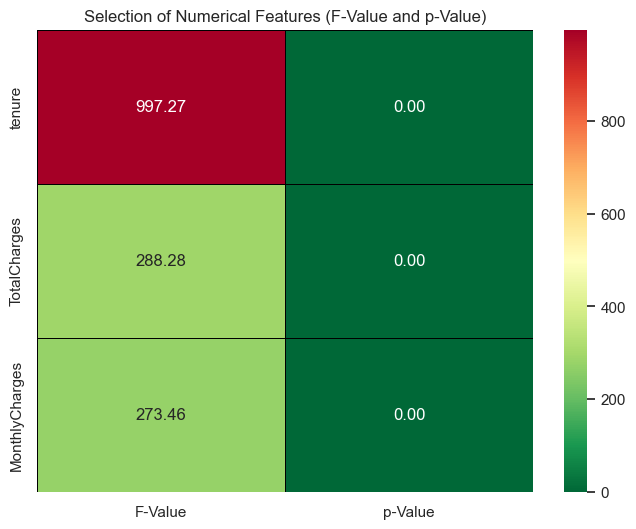

In [810]:
from sklearn.feature_selection import f_classif, SelectKBest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target
features = df.loc[:, num_cols]
target = df.loc[:, 'Churn']

# Apply SelectKBest with f_classif as the score function
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Create a DataFrame for the F-scores and p-values
featureScores = pd.DataFrame({
    'F-Value': fit.scores_,
    'p-Value': fit.pvalues_
}, index=list(features.columns))

# Sort the DataFrame by F-Value
sorted_features = featureScores.sort_values(ascending=False, by='F-Value')

# Plot the heatmap
plt.subplots(figsize=(8, 6))
sns.heatmap(sorted_features, annot=True, cmap='RdYlGn_r', linewidths=0.4, linecolor='black', fmt='.2f')

# Add plot title
plt.title('Selection of Numerical Features (F-Value and p-Value)')
plt.show()

# **9. Feature Reduction**

In [811]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,tenure_bin_Long,tenure_bin_Mid,tenure_bin_New
0,0,0,1,0,0.013889,0,0,0,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0,0,0.472222,1,0,1,0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,0,0.027778,1,0,1,1,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.625000,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0.027778,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


**Mutual Information Score**

In [812]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Churn' is the target variable and df1_tenure is your preprocessed DataFrame
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (not strictly necessary for mutual_info_classif)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate mutual information between each feature and the target variable
mi_scores = mutual_info_classif(X_train_scaled, y_train)

# Create a DataFrame to display the feature names and their mutual information scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': mi_scores})

# Sort the DataFrame by score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Mutual_Information_Score', ascending=False)

# Print all feature scores
print("All Feature Mutual Information Scores:")
print(feature_scores_df)

# Select the features with non-zero mutual information scores
selected_features = feature_scores_df[feature_scores_df['Mutual_Information_Score'] > 0]['Feature'].tolist()

# Print the selected features
print("\nSelected features:", selected_features)

All Feature Mutual Information Scores:
                                    Feature  Mutual_Information_Score
18                  Contract_Month-to-month                  0.082145
4                                    tenure                  0.079689
17                        Contract_Internet                  0.078812
20                        Contract_Two year                  0.065264
30                           tenure_bin_New                  0.054903
28                          tenure_bin_Long                  0.053715
16                                ChurnRisk                  0.052180
26              InternetService_Fiber optic                  0.045866
15                             TotalCharges                  0.045667
23           PaymentMethod_Electronic check                  0.042384
27                       InternetService_No                  0.041584
14                           MonthlyCharges                  0.040485
19                        Contract_One year        

**Lasso Coefficient (L1 Regularization)**

In [813]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'Churn' is the target variable and df1_tenure is your preprocessed DataFrame
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for Lasso, which is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso model (alpha controls the regularization strength)
lasso = Lasso(alpha=0.01)

# Fit the Lasso model to the training data
lasso.fit(X_train_scaled, y_train)

# Get the coefficients of the features
lasso_coefficients = lasso.coef_

# Create a DataFrame to display the feature names and their Lasso coefficients
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Lasso_Coefficient': lasso_coefficients})

# Sort the DataFrame by coefficient magnitude in descending order
feature_scores_df = feature_scores_df.reindex(feature_scores_df['Lasso_Coefficient'].abs().sort_values(ascending=False).index)

# Print all feature coefficients
print("All Feature Coefficients:")
print(feature_scores_df)

# Select the features with non-zero coefficients
selected_features = feature_scores_df[feature_scores_df['Lasso_Coefficient'] != 0]['Feature'].tolist()

# Print the selected features
print("\nSelected features:", selected_features)

All Feature Coefficients:
                                    Feature  Lasso_Coefficient
4                                    tenure          -0.069636
16                                ChurnRisk           0.045987
18                  Contract_Month-to-month           0.043430
27                       InternetService_No          -0.039935
17                        Contract_Internet           0.038776
23           PaymentMethod_Electronic check           0.033652
7                            OnlineSecurity          -0.024634
26              InternetService_Fiber optic           0.023408
13                         PaperlessBilling           0.016782
12                          StreamingMovies           0.013598
1                             SeniorCitizen           0.012659
10                              TechSupport          -0.012535
29                           tenure_bin_Mid          -0.006281
8                              OnlineBackup          -0.004627
3                            

**Information Gain**

In [814]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Churn' is the target variable and df1_tenure is your preprocessed DataFrame
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional, typically not necessary for tree models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate Information Gain (Mutual Information) for each feature
mutual_info = mutual_info_classif(X_train_scaled, y_train)

# Create a DataFrame to display the feature names and their Information Gain scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': mutual_info})

# Sort the DataFrame by Information Gain in descending order
feature_importance_df = feature_importance_df.sort_values(by='Information Gain', ascending=False)

# Print all feature Information Gain scores
print("Feature Information Gain (Mutual Information):")
print(feature_importance_df)

# Select the top k features (for example, top 10)
num_features_to_select = 10  # Change this to select a different number of features
selected_features = feature_importance_df.head(num_features_to_select)['Feature'].tolist()

# Print the selected features
print("\nSelected features:", selected_features)

Feature Information Gain (Mutual Information):
                                    Feature  Information Gain
18                  Contract_Month-to-month          0.090685
17                        Contract_Internet          0.088936
4                                    tenure          0.064773
16                                ChurnRisk          0.062324
20                        Contract_Two year          0.058458
14                           MonthlyCharges          0.046823
30                           tenure_bin_New          0.046758
15                             TotalCharges          0.045498
28                          tenure_bin_Long          0.043311
23           PaymentMethod_Electronic check          0.040991
26              InternetService_Fiber optic          0.040265
27                       InternetService_No          0.031562
19                        Contract_One year          0.026184
3                                Dependents          0.020228
7                      

In [815]:
# List of final selected features
final_features = [
    'SeniorCitizen',
    'Dependents',
    'Contract_Month-to-month',
    'Contract_One year',
    'Contract_Two year',
    'tenure_bin_New',
    'tenure_bin_Mid',
    'tenure_bin_Long',
    'InternetService_Fiber optic',
    'OnlineSecurity',
    'TechSupport',
    'PaymentMethod_Electronic check',
    'PaperlessBilling',
    'MonthlyCharges',
    'TotalCharges',
    'Churn']

# Create a new DataFrame with the selected features
df_final = df[final_features]

# Display the new DataFrame
df_final.head()

,SeniorCitizen,Dependents,Contract_Month-to-month,Contract_One year,Contract_Two year,tenure_bin_New,tenure_bin_Mid,tenure_bin_Long,InternetService_Fiber optic,OnlineSecurity,TechSupport,PaymentMethod_Electronic check,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1.0,1,29.85,29.85,0
1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0.0,0,56.95,1889.50,0
2,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.0,1,53.85,108.15,1
3,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,0,42.30,1840.75,0
4,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1.0,1,70.70,151.65,1


In [816]:
df_final.nunique()

SeniorCitizen                        2
Dependents                           2
Contract_Month-to-month              2
Contract_One year                    2
Contract_Two year                    2
tenure_bin_New                       2
tenure_bin_Mid                       2
tenure_bin_Long                      2
InternetService_Fiber optic          2
OnlineSecurity                       2
TechSupport                          2
PaymentMethod_Electronic check       2
PaperlessBilling                     2
MonthlyCharges                    1585
TotalCharges                      6531
Churn                                2
dtype: int64

**Final Features**

*     SeniorCitizen
*     Dependents
*     Contract_Month-to-month
*     Contract_One year
*     Contract_Two year
*     tenure_bin_New
*     tenure_bin_Mid
*     tenure_bin_Long
*     InternetService_Fiber optic
*     OnlineSecurity
*     TechSupport
*     PaymentMethod_Electronic check
*     PaperlessBilling
*     MonthlyCharges
*     TotalCharges
*     Churn

In [817]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SeniorCitizen                   7043 non-null   int32  
 1   Dependents                      7043 non-null   int32  
 2   Contract_Month-to-month         7043 non-null   float64
 3   Contract_One year               7043 non-null   float64
 4   Contract_Two year               7043 non-null   float64
 5   tenure_bin_New                  7043 non-null   float64
 6   tenure_bin_Mid                  7043 non-null   float64
 7   tenure_bin_Long                 7043 non-null   float64
 8   InternetService_Fiber optic     7043 non-null   float64
 9   OnlineSecurity                  7043 non-null   int32  
 10  TechSupport                     7043 non-null   int32  
 11  PaymentMethod_Electronic check  7043 non-null   float64
 12  PaperlessBilling                70

In [818]:
# df_final = df_final.drop(columns=['Contract_Month-to-month'], errors='ignore')  # Drop the column when loading the DataFrame

In [819]:
df_final = df_final.rename(columns={'Contract_Month-to-month': 'Contract_MonthToMonth'})

In [820]:
df_final = df_final.rename(columns={'Contract_One year': 'Contract_One_year'})  # Update with the new name

In [821]:
df_final = df_final.rename(columns={'Contract_Two year': 'Contract_Two_year'})  # Rename in the DataFrame

In [822]:
df_final = df_final.rename(columns={'InternetService_Fiber optic': 'InternetService_Fiber_optic'})  # Rename in the DataFrame

In [823]:
df_final = df_final.rename(columns={'PaymentMethod_Electronic check': 'PaymentMethod_Electronic_check'})  # Rename in the DataFrame

In [824]:
final_df = df_final
df_final = final_df

In [825]:
df_final

,SeniorCitizen,Dependents,Contract_MonthToMonth,Contract_One_year,Contract_Two_year,tenure_bin_New,tenure_bin_Mid,tenure_bin_Long,InternetService_Fiber_optic,OnlineSecurity,TechSupport,PaymentMethod_Electronic_check,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1.0,1,29.85,29.85,0
1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0.0,0,56.95,1889.50,0
2,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.0,1,53.85,108.15,1
3,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,0,42.30,1840.75,0
4,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1.0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,0.0,1,84.80,1990.50,0
7039,0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0.0,1,103.20,7362.90,0
7040,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1.0,1,29.60,346.45,0
7041,1,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.0,1,74.40,306.60,1


# **10. UpSampling by SMOTE**

**Upsampling the minority class (churn) to address class imbalance.**

In [826]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print(y_train_smote.value_counts())

# Proceed with modeling using X_train_smote, y_train_smote

Churn
0    3635
1    3635
Name: count, dtype: int64


In [827]:
X_train_smote.shape, y_train_smote.shape, X_test.shape, y_test.shape

((7270, 15), (7270,), (2113, 15), (2113,))

# **11. Machine Learning Algorithms**

# **11. 1. AdaBoost Classifier**

In [828]:
# prompt: convert above code to Ada Boost
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Initialize the AdaBoost Classifier
model_ada = AdaBoostClassifier(n_estimators=200, random_state=42)

# Train the model with the training data
model_ada.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model_ada.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(model_ada, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


Accuracy: 0.79

Class 0 Metrics:
Precision: 0.89
Recall: 0.81
F1-Score: 0.85

Class 1 Metrics:
Precision: 0.59
Recall: 0.72
F1-Score: 0.65

Confusion Matrix:
[[1250  289]
 [ 158  416]]

Cross-Validation Accuracy Score: 0.8260 ± 0.0645


# **11. 2. Gradient Boosting Classifier**

In [829]:
# prompt: convert above code to Gradient boost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=200, random_state=42)

# Train the model with the training data
model_gb.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model_gb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(model_gb, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


Accuracy: 0.79

Class 0 Metrics:
Precision: 0.87
Recall: 0.83
F1-Score: 0.85

Class 1 Metrics:
Precision: 0.60
Recall: 0.67
F1-Score: 0.63

Confusion Matrix:
[[1283  256]
 [ 192  382]]

Cross-Validation Accuracy Score: 0.8307 ± 0.0690


# **11. 3. Logistic Regression**

In [830]:
# prompt: convert above code to Gradient boost
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Gradient Boosting Classifier
model_lr = LogisticRegression(max_iter=1000, random_state=42)

# Train the model with the training data
model_lr.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(model_lr, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


Accuracy: 0.75

Class 0 Metrics:
Precision: 0.88
Recall: 0.76
F1-Score: 0.82

Class 1 Metrics:
Precision: 0.53
Recall: 0.73
F1-Score: 0.62

Confusion Matrix:
[[1172  367]
 [ 153  421]]

Cross-Validation Accuracy Score: 0.7795 ± 0.0352


# **11. 4. Random Forest Classifier**

In [831]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost Classifier
model_rfc = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=2)

# Train the model with the training data
model_rfc.fit(X_train_smote, y_train_smote)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(model_rfc, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


Accuracy: 0.75

Class 0 Metrics:
Precision: 0.88
Recall: 0.76
F1-Score: 0.82

Class 1 Metrics:
Precision: 0.53
Recall: 0.73
F1-Score: 0.62

Confusion Matrix:
[[1172  367]
 [ 153  421]]

Cross-Validation Accuracy Score: 0.7909 ± 0.0385


# **11. 5. Decision Tree Classifier**

In [832]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost Classifier
model_dt = DecisionTreeClassifier(max_depth=3, random_state=2)

# Train the model with the training data
model_dt.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(model_dt, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


Accuracy: 0.75

Class 0 Metrics:
Precision: 0.83
Recall: 0.83
F1-Score: 0.83

Class 1 Metrics:
Precision: 0.55
Recall: 0.54
F1-Score: 0.55

Confusion Matrix:
[[1283  256]
 [ 263  311]]

Cross-Validation Accuracy Score: 0.7703 ± 0.0605


# **11. 6. Stack of Previous Models**

In [833]:
# # Import necessary libraries
# from sklearn.ensemble import StackingClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import numpy as np

# # Define the base models
# estimators = [
#     ('gb', model_gb),
#     ('ada', model_ada),
#     ('lr', model_lr),
#     ('dt', model_dt),
#     ('rfc', model_rfc)
# ]

# # Create the stacking classifier
# stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# # Train the stacking model
# stacking_model.fit(X_train_smote, y_train_smote)

# # Make predictions on the test set
# y_pred = stacking_model.predict(X_test)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# print(f'\nAccuracy: {accuracy:.2f}')

# # Manually compute precision, recall, and F1-score for each class
# precision_0 = precision_score(y_test, y_pred, pos_label=0)
# recall_0 = recall_score(y_test, y_pred, pos_label=0)
# f1_0 = f1_score(y_test, y_pred, pos_label=0)

# precision_1 = precision_score(y_test, y_pred, pos_label=1)
# recall_1 = recall_score(y_test, y_pred, pos_label=1)
# f1_1 = f1_score(y_test, y_pred, pos_label=1)

# # Print the metrics for each class
# print('\nClass 0 Metrics:')
# print(f'Precision: {precision_0:.2f}')
# print(f'Recall: {recall_0:.2f}')
# print(f'F1-Score: {f1_0:.2f}')

# print('\nClass 1 Metrics:')
# print(f'Precision: {precision_1:.2f}')
# print(f'Recall: {recall_1:.2f}')
# print(f'F1-Score: {f1_1:.2f}')

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("\nConfusion Matrix:")
# print(cm)

# # Cross-validation score (using accuracy)
# cv_scores = cross_val_score(stacking_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
# print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

# **11. 7. Voting Classifier of above 4 Algorithms**

In [834]:
# prompt: voting regressor for above 4 algorithms
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Create a voting classifier with the four models
voting_classifier = VotingClassifier(estimators=[
    ('gb', model_gb),
    ('ada', model_ada),
    ('lr', model_lr),
    ('dt', model_dt),
    ('rfc', model_rfc)
], voting='hard')  # 'hard' for majority vote

# Train the voting classifier
voting_classifier.fit(X_train_smote, y_train_smote)

# Make predictions with the voting classifier
y_pred = voting_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(voting_classifier, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


Accuracy: 0.77

Class 0 Metrics:
Precision: 0.89
Recall: 0.79
F1-Score: 0.84

Class 1 Metrics:
Precision: 0.57
Recall: 0.73
F1-Score: 0.64

Confusion Matrix:
[[1216  323]
 [ 154  420]]

Cross-Validation Accuracy Score: 0.8187 ± 0.0558


# **12. Import into Pickle file**

In [835]:
import pickle

In [836]:
pickle.dump(final_df,open('../models/df.pkl','wb'))
pickle.dump(voting_classifier,open('../models/classifier.pkl','wb'))

In [837]:
final_df.head(10)

,SeniorCitizen,Dependents,Contract_MonthToMonth,Contract_One_year,Contract_Two_year,tenure_bin_New,tenure_bin_Mid,tenure_bin_Long,InternetService_Fiber_optic,OnlineSecurity,TechSupport,PaymentMethod_Electronic_check,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1.0,1,29.85,29.85,0
1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0.0,0,56.95,1889.50,0
2,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.0,1,53.85,108.15,1
3,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,0,42.30,1840.75,0
4,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1.0,1,70.70,151.65,1
5,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1.0,1,99.65,820.50,1
6,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.0,1,89.10,1949.40,0
7,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.0,0,29.75,301.90,0
8,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1,1.0,1,104.80,3046.05,1
9,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0.0,0,56.15,3487.95,0


In [838]:
final_df.dtypes

SeniorCitizen                       int32
Dependents                          int32
Contract_MonthToMonth             float64
Contract_One_year                 float64
Contract_Two_year                 float64
tenure_bin_New                    float64
tenure_bin_Mid                    float64
tenure_bin_Long                   float64
InternetService_Fiber_optic       float64
OnlineSecurity                      int32
TechSupport                         int32
PaymentMethod_Electronic_check    float64
PaperlessBilling                    int32
MonthlyCharges                    float64
TotalCharges                      float64
Churn                               int32
dtype: object

In [839]:
final_df.nunique()

SeniorCitizen                        2
Dependents                           2
Contract_MonthToMonth                2
Contract_One_year                    2
Contract_Two_year                    2
tenure_bin_New                       2
tenure_bin_Mid                       2
tenure_bin_Long                      2
InternetService_Fiber_optic          2
OnlineSecurity                       2
TechSupport                          2
PaymentMethod_Electronic_check       2
PaperlessBilling                     2
MonthlyCharges                    1585
TotalCharges                      6531
Churn                                2
dtype: int64

In [840]:
final_df.min()

SeniorCitizen                      0.00
Dependents                         0.00
Contract_MonthToMonth              0.00
Contract_One_year                  0.00
Contract_Two_year                  0.00
tenure_bin_New                     0.00
tenure_bin_Mid                     0.00
tenure_bin_Long                    0.00
InternetService_Fiber_optic        0.00
OnlineSecurity                     0.00
TechSupport                        0.00
PaymentMethod_Electronic_check     0.00
PaperlessBilling                   0.00
MonthlyCharges                    18.25
TotalCharges                       0.00
Churn                              0.00
dtype: float64

In [841]:
final_df.max()

SeniorCitizen                        1.00
Dependents                           1.00
Contract_MonthToMonth                1.00
Contract_One_year                    1.00
Contract_Two_year                    1.00
tenure_bin_New                       1.00
tenure_bin_Mid                       1.00
tenure_bin_Long                      1.00
InternetService_Fiber_optic          1.00
OnlineSecurity                       1.00
TechSupport                          1.00
PaymentMethod_Electronic_check       1.00
PaperlessBilling                     1.00
MonthlyCharges                     118.75
TotalCharges                      8684.80
Churn                                1.00
dtype: float64

<pre>
    SeniorCitizen                       int32
    Dependents                          int32
    Contract_MonthToMonth             float64
    Contract_One_year                 float64
    Contract_Two_year                 float64
    tenure_bin_New                    float64
    tenure_bin_Mid                    float64
    tenure_bin_Long                   float64
    InternetService_Fiber_optic       float64
    OnlineSecurity                      int32
    TechSupport                         int32
    PaymentMethod_Electronic_check    float64
    PaperlessBilling                    int32
    MonthlyCharges                    float64
    TotalCharges                      float64
    Churn                               int32
</pre>